# Welcome to the Covid-19 Data Analysis Notebook
------------------------------------------

### Let's import the modules

In [476]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical operations
import seaborn as sns       # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting graphs and figures

print('Modules are imported.')

Modules are imported.


## Task 2

### Task 2.1: Importing the Covid-19 dataset
Importing "Covid19_Confirmed_dataset.csv" from the "./Dataset" folder.

In [477]:
# Import dataset.
data = pd.read_csv('Datasets/covid19_Confirmed_dataset.csv')
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the DataFrame

In [478]:
data.shape

(266, 104)

### Task 2.2: Delete the unnecessary columns

In [479]:
data.drop(['Lat', 'Long'], axis=1, inplace=True)  # Dropping unnecessary columns

In [480]:
data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregating the rows by country

In [481]:
data_aggregated = data.groupby('Country/Region').sum()

In [482]:
data_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [483]:
data_aggregated.shape

(187, 101)

### Task 2.4: Visualizing data related to a country, for example, China
Visualization always helps us better understand our data.

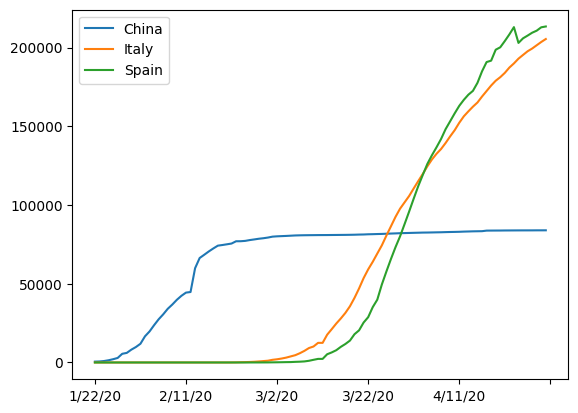

In [484]:
# Select only the numeric (date) columns for China and plot
data_aggregated.loc['China'].drop('Province/State', errors='ignore').plot()
data_aggregated.loc['Italy'].drop('Province/State', errors='ignore').plot()
data_aggregated.loc['Spain'].drop('Province/State', errors='ignore').plot()

plt.legend()

### Task 3: Calculating a good measure
We need to find a good measure, represented as a number, describing the spread of the virus in a country.

<Axes: >

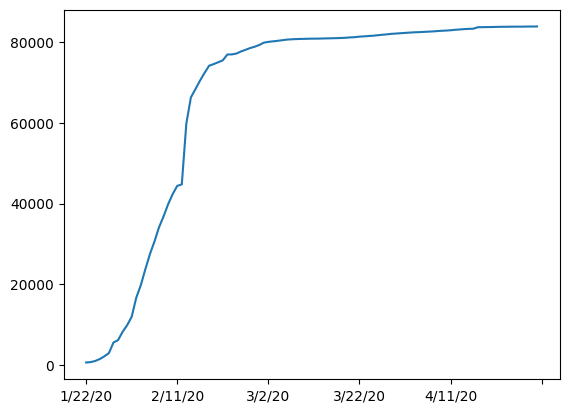

In [485]:
data_aggregated.loc['China'].drop('Province/State', errors='ignore').plot()

<Axes: >

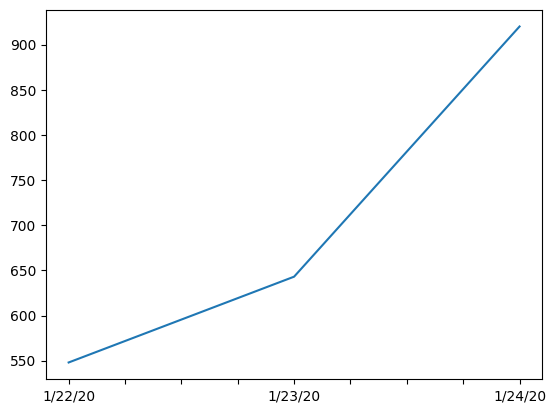

In [486]:
# Plot the first 3 date columns for China (excluding 'Province/State' if present)
data_aggregated.loc['China'].drop('Province/State', errors='ignore').iloc[:3].plot()

### Task 3.1: Calculating the first derivative of the curve

<Axes: >

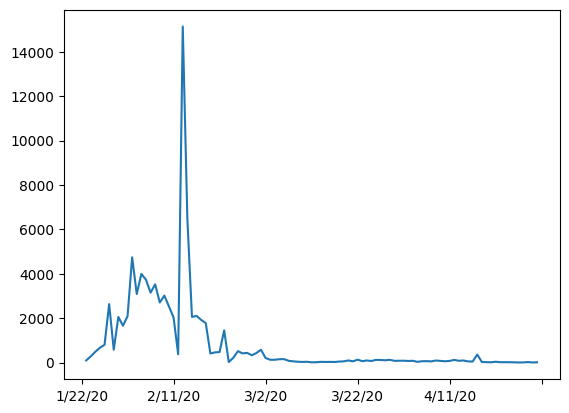

In [487]:
data_aggregated.loc['China'].drop('Province/State', errors='ignore').diff().plot()

### Task 3.2: Find the maximum infection rate for China

In [488]:
data_aggregated.loc['China'].drop('Province/State', errors='ignore').diff().max()

15136

In [489]:
data_aggregated.loc['Italy'].drop('Province/State', errors='ignore').diff().max()

6557

In [490]:
data_aggregated.loc['Spain'].drop('Province/State', errors='ignore').diff().max()

9630

In [491]:
data_aggregated.loc['US'].drop('Province/State', errors='ignore').diff().max()

36188

### Task 3.3: Find the maximum infection rate for all countries

In [492]:
max_infection_rates = []
for c in countries:
    max_infection_rates.append(
        data_aggregated.loc[c].drop('Province/State', errors='ignore').diff().max()
    )
data_aggregated['max_infection_rate'] = max_infection_rates

In [493]:
data_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5


### Task 3.4: Create a new DataFrame with only the needed column

In [494]:
data_dropped = pd.DataFrame(data_aggregated['max_infection_rate'])

In [495]:
data_dropped.head()

,max_infection_rate
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5


In [496]:
corona_data = data_dropped

### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [497]:
happiness_report = pd.read_csv('Datasets/worldwide_happiness_report.csv')

In [498]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [499]:
columns_to_drop = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

In [500]:
happiness_report.drop(columns=columns_to_drop, axis=1,inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [501]:
happiness_report.set_index('Country or region', inplace=True)  # Set 'Country name' as index
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset:

In [502]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5


In [503]:
corona_data.shape

(187, 1)

#### World Happiness Report Dataset:

In [504]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [505]:
happiness_report.shape

(156, 4)

### Task 4.5: correlation matrix 

In [506]:
combined_data = corona_data.join(happiness_report, how='inner')
combined_data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [507]:
combined_data.corr().style.background_gradient(cmap='coolwarm')

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5.1: Plotting GDP per capita vs. maximum infection rate

In [508]:
combined_data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283


<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

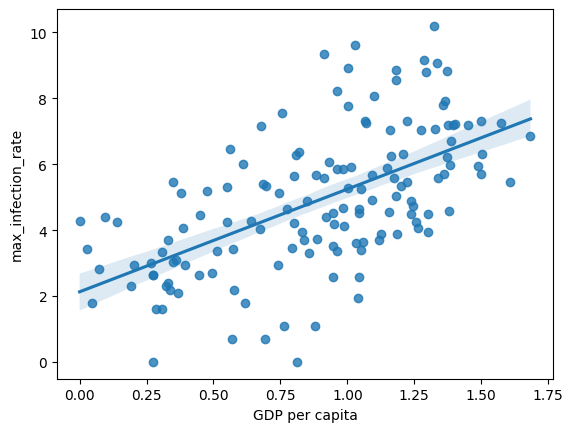

In [509]:
x = combined_data['GDP per capita']
y = combined_data['max_infection_rate']
sns.regplot(x=x, y=np.log(y))

### Task 5.2: Plotting Social Support vs. Maximum Infection Rate

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

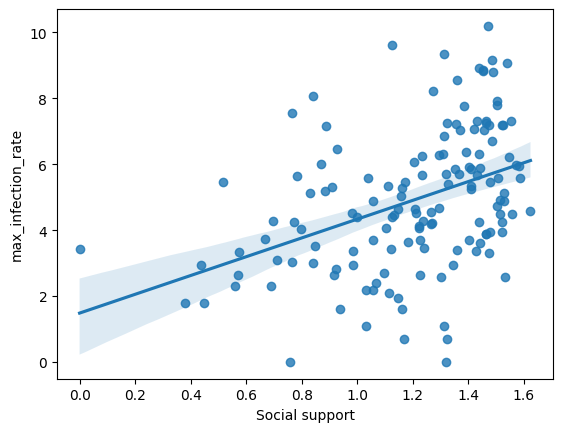

In [510]:
x = combined_data['Social support']
y = combined_data['max_infection_rate']
sns.regplot(x=x, y=np.log(y))

### Task 5.3: Plotting Healthy Life Expectancy vs. Maximum Infection Rate

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

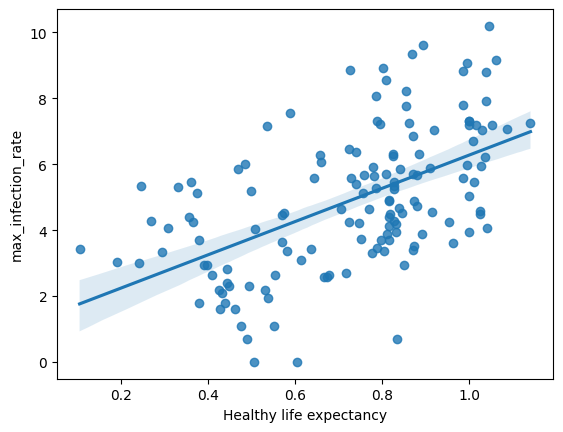

In [511]:
x = combined_data['Healthy life expectancy']
y = combined_data['max_infection_rate']
sns.regplot(x=x, y=np.log(y))

### Task 5.4: Plotting Freedom to Make Life Choices vs. Maximum Infection Rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

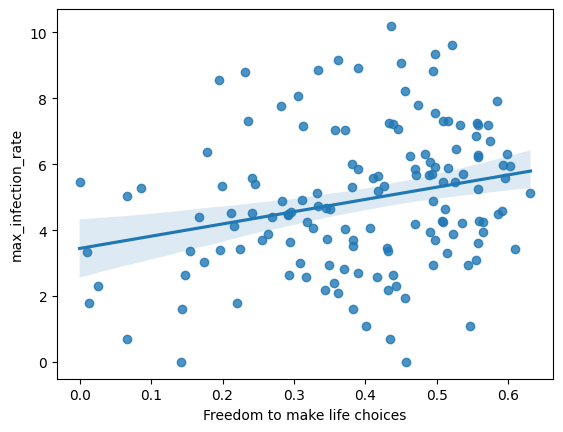

In [512]:
x = combined_data['Freedom to make life choices']
y = combined_data['max_infection_rate']
sns.regplot(x=x, y=np.log(y))

### Task 6:
- Import the covid19_deaths_dataset.csv dataset
- Select the needed columns for our analysis
- Join the datasets
- Calculate the correlations as the result of our analysis

### Task 6.1: Importing the dataset - Covid-19 Deaths

In [513]:
covid19_deaths = pd.read_csv('Dataset for practice/covid19_deaths_dataset.csv')

In [514]:
covid19_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### Task 6.2: Delete the unnecessary columns

In [515]:
covid19_deaths.drop(['Lat', 'Long'], axis=1, inplace=True)  # Dropping unnecessary columns

In [516]:
covid19_deaths.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [517]:
covid19_deaths_aggregated = covid19_deaths.groupby('Country/Region').sum()

In [518]:
covid19_deaths_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [519]:
covid19_deaths_aggregated.shape

(187, 101)

### Task 6.3: Calculating the first derivative of the curve

<Axes: >

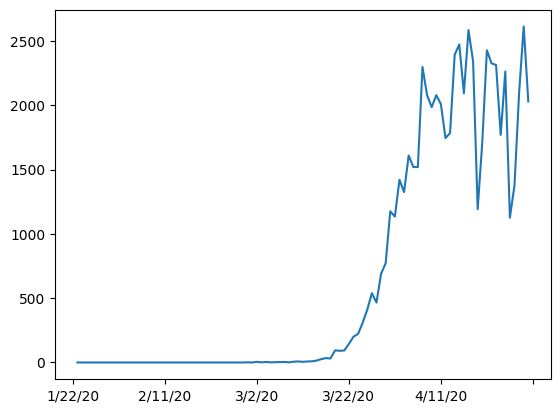

In [520]:
covid19_deaths_aggregated.loc['US'].drop('Province/State', errors='ignore').diff().plot()

### Task 6.4: Find the maximum death rate for all countries

In [521]:
max_death_rates = []
for c in countries:
    max_death_rates.append(
        covid19_deaths_aggregated.loc[c].drop('Province/State', errors='ignore').diff().max()
    )
covid19_deaths_aggregated['max_death_rate'] = max_death_rates

In [522]:
covid19_deaths_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### Task 6.5: Create a new DataFrame with only the needed column

In [523]:
covid19_deaths_dropped = pd.DataFrame(covid19_deaths_aggregated['max_death_rate'])

In [524]:
covid19_deaths_dropped.head()

,max_death_rate
Country/Region,
Afghanistan,7
Albania,4
Algeria,30
Andorra,4
Angola,2


In [525]:
covid19_death_data = covid19_deaths_dropped

### Task 7.1: Now let's join the three datasets we have prepared

#### Corona Dataset:

In [526]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5


In [527]:
corona_data.shape

(187, 1)

#### World Happiness Report Dataset:

In [528]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [529]:
happiness_report.shape

(156, 4)

#### Covid19 Deaths Dataset:

In [530]:
covid19_death_data.head()

,max_death_rate
Country/Region,
Afghanistan,7
Albania,4
Algeria,30
Andorra,4
Angola,2


In [531]:
covid19_death_data.shape

(187, 1)

In [532]:
combined_data = combined_data.join(covid19_death_data, how='inner')
combined_data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rate
Afghanistan,232,0.350,0.517,0.361,0.000,7
Albania,34,0.947,0.848,0.874,0.383,4
Algeria,199,1.002,1.160,0.785,0.086,30
Argentina,291,1.092,1.432,0.881,0.471,13
Armenia,134,0.850,1.055,0.815,0.283,3


### Task 8: Visualization of the results
Our analysis is not complete unless we visualize the results with figures and graphs so that everyone can understand the insights from our analysis.

In [533]:
combined_data.corr().style.background_gradient(cmap='coolwarm')

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rate
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196,0.880597
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603,0.259893
Social support,0.191958,0.759468,1.000000,0.765286,0.456246,0.204148
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892,0.309666
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000,0.080166
max_death_rate,0.880597,0.259893,0.204148,0.309666,0.080166,1.000000


### Task 8.1: Plotting GDP per capita vs. maximum death rate

In [534]:
combined_data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rate
Afghanistan,232,0.350,0.517,0.361,0.000,7
Albania,34,0.947,0.848,0.874,0.383,4
Algeria,199,1.002,1.160,0.785,0.086,30
Argentina,291,1.092,1.432,0.881,0.471,13
Armenia,134,0.850,1.055,0.815,0.283,3


<Axes: xlabel='Social support', ylabel='max_death_rate'>

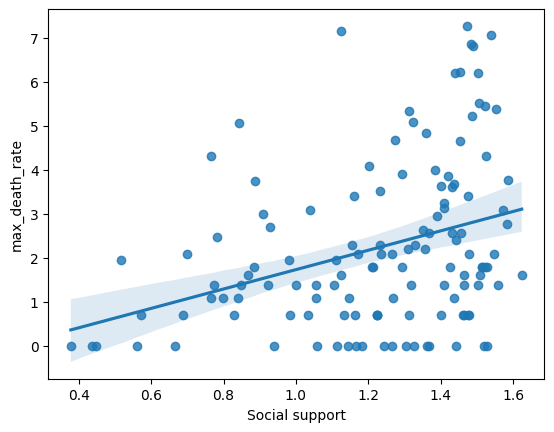

In [545]:
mask = y > 0
sns.regplot(x=x[mask], y=np.log(y[mask]))

### Task 8.2: Plotting Social Support vs. Maximum Death Rate

<Axes: xlabel='Social support', ylabel='max_death_rate'>

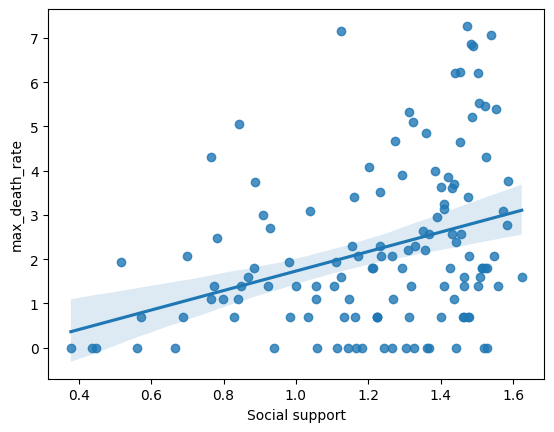

In [546]:
x = combined_data['Social support']
y = combined_data['max_death_rate']
sns.regplot(x=x[mask], y=np.log(y[mask]))

### Task 8.3: Plotting Healthy Life Expectancy vs. Maximum Death Rate

<Axes: xlabel='Healthy life expectancy', ylabel='max_death_rate'>

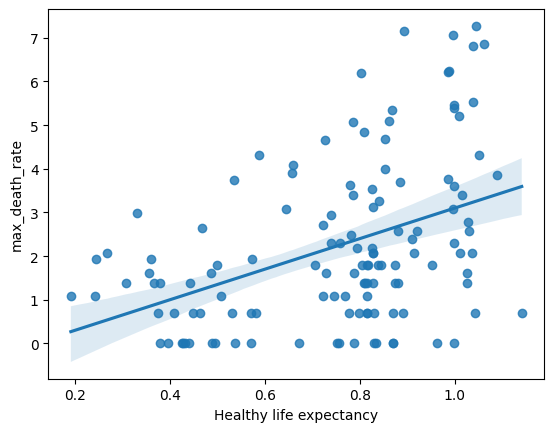

In [547]:
x = combined_data['Healthy life expectancy']
y = combined_data['max_death_rate']
sns.regplot(x=x[mask], y=np.log(y[mask]))

### Task 8.4: Plotting Freedom to Make Life Choices vs. Maximum Death Rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_death_rate'>

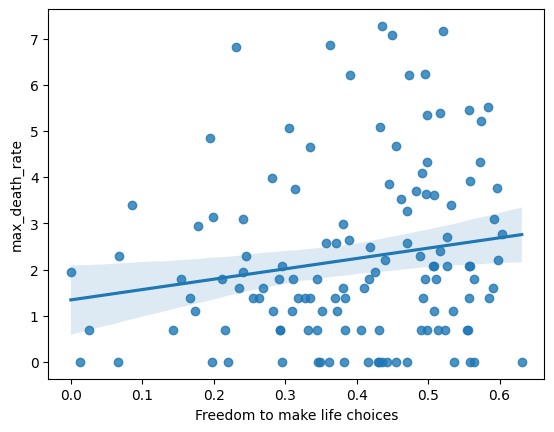

In [548]:
x = combined_data['Freedom to make life choices']
y = combined_data['max_death_rate']
sns.regplot(x=x[mask], y=np.log(y[mask]))

### Task 8.5: Plotting Maximum Infection Rate vs. Maximum Death Rate

<Axes: xlabel='max_infection_rate', ylabel='max_death_rate'>

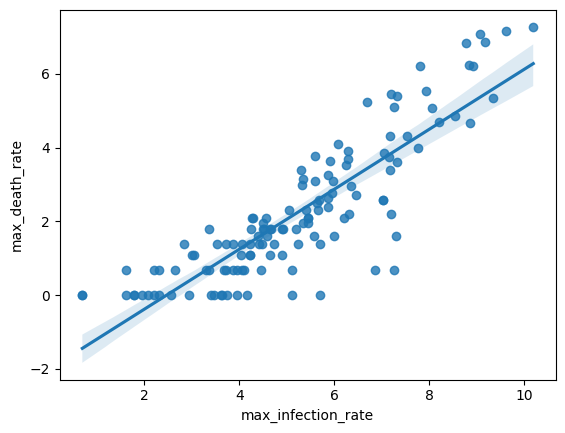

In [549]:
x = combined_data['max_infection_rate']
y = combined_data['max_death_rate']
sns.regplot(x=np.log(x[mask]), y=np.log(y[mask]))